<a href="https://colab.research.google.com/github/Manya123-max/Deep-Learning-Algorithms-/blob/main/DeepLab3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART-A (CNN MODEL TRAINING FOR ONE IMAGE)**

In [ ]:
! pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.applications.vgg16 import preprocess_input

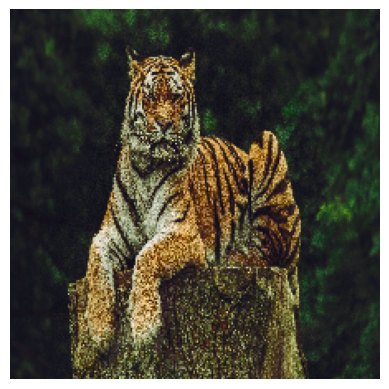

In [ ]:
# Load image and resize to 224x224 pixels (you can adjust path as needed)
image_path = '/content/frida-lannerstrom-IDO_a-dxrCY-unsplash.jpg'
img = load_img(image_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = img_to_array(img)

# Normalize the image data
img_array = img_array.astype('float32') / 255.0

# Display the image using matplotlib
plt.imshow(img_array)
plt.axis('off')  # Hide axis
plt.show()

# Add a batch dimension since the model expects a batch of images
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
# Build a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(512, activation='relu'))

# Add Dropout for regularization to prevent overfitting
model.add(Dropout(0.5))

# Output layer (assuming a binary classification)
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Create a "dummy" dataset by duplicating the single image for both training and validation
X_train = np.concatenate([img_array, img_array], axis=0)  # Duplicate the image
y_train = np.array([1, 1])  # Duplicate the label

# Train the model with the duplicated dataset
history = model.fit(X_train,y_train,epochs=10,validation_data=(img_array, np.array([1]))  # Use the single image for validation
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0

In [ ]:
# Evaluate model performance
validation_loss, validation_accuracy = model.evaluate(img_array, np.array([1]))
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


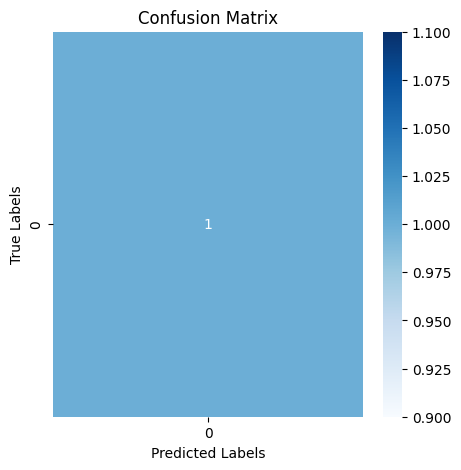

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Since we have only one image, predictions will be for that single instance
y_pred = model.predict(img_array)
y_pred_class = (y_pred > 0.5).astype("int32")  # Binarizing prediction

# Generate the confusion matrix (not very meaningful with just one sample)
y_true = np.array([1])  # True label
conf_matrix = confusion_matrix(y_true, y_pred_class)

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_class))


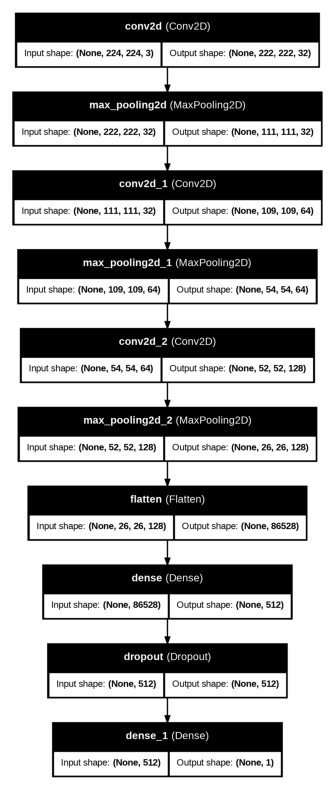

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

# Visualize the model architecture
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# Load and display the saved model visualization
img = Image.open('model_visualization.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()


# **PART-B ( CNN MODEL TRAINING FOR KERAS DATASET )**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (scale between 0 and 1)
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

# Display the shape of the data to verify
print(f"Training set shape: {x_train_cifar.shape}, Labels shape: {y_train_cifar.shape}")
print(f"Test set shape: {x_test_cifar.shape}, Labels shape: {y_test_cifar.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training set shape: (50000, 32, 32, 3), Labels shape: (50000, 10)
Test set shape: (10000, 32, 32, 3), Labels shape: (10000, 10)


In [ ]:
# Build a Sequential model for CIFAR-10 dataset
model_cifar = Sequential()

# Add convolutional layers
model_cifar.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))

model_cifar.add(Conv2D(64, (3, 3), activation='relu'))
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))

model_cifar.add(Conv2D(128, (3, 3), activation='relu'))
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D feature vectors
model_cifar.add(Flatten())


# Fully connected dense layer
model_cifar.add(Dense(512, activation='relu'))

# Add Dropout for regularization to prevent overfitting
model_cifar.add(Dropout(0.5))

# Output layer (for 10 classes in CIFAR-10)
model_cifar.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_cifar.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print the model summary
model_cifar.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model on CIFAR-10 dataset
history_cifar = model_cifar.fit(
    x_train_cifar,  # Training data
    y_train_cifar,  # Training labels
    epochs=10,  # You can increase the number of epochs for better results
    validation_data=(x_test_cifar, y_test_cifar)  # Validation on the test set
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3444 - loss: 1.7637 - val_accuracy: 0.5628 - val_loss: 1.2155
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5800 - loss: 1.1837 - val_accuracy: 0.6423 - val_loss: 1.0383
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6407 - loss: 1.0154 - val_accuracy: 0.6752 - val_loss: 0.9220
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6885 - loss: 0.8959 - val_accuracy: 0.6889 - val_loss: 0.9031
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7152 - loss: 0.8213 - val_accuracy: 0.6883 - val_loss: 0.8871
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7336 - loss: 0.7493 - val_accuracy: 0.7080 - val_loss: 0.8489
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7595 - loss: 0.6933 - val_accuracy: 0.7132 - val_loss: 0.8364
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7736 - loss: 0.6474 -

In [ ]:
# Evaluate the model performance on the test data
test_loss_cifar, test_accuracy_cifar = model_cifar.evaluate(x_test_cifar, y_test_cifar)
print(f"Test Accuracy: {test_accuracy_cifar * 100:.2f}%")

# Save the trained model
model_cifar.save('cifar10_classification_model.h5')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7383 - loss: 0.8053


Test Accuracy: 73.01%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


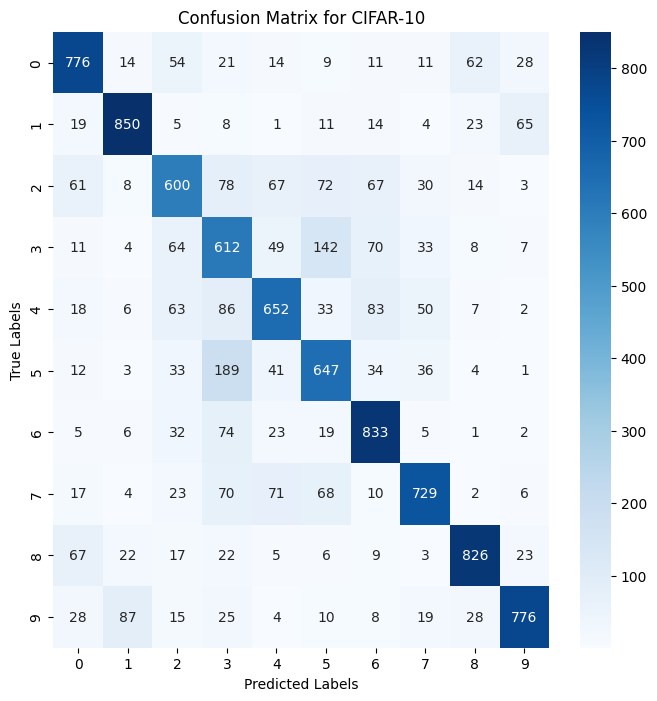

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1000
           1       0.85      0.85      0.85      1000
           2       0.66      0.60      0.63      1000
           3       0.52      0.61      0.56      1000
           4       0.70      0.65      0.68      1000
           5       0.64      0.65      0.64      1000
           6       0.73      0.83      0.78      1000
           7       0.79      0.73      0.76      1000
           8       0.85      0.83      0.84      1000
           9       0.85      0.78      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [ ]:
# Predict the classes for the test dataset
y_pred_cifar = model_cifar.predict(x_test_cifar)
y_pred_classes_cifar = np.argmax(y_pred_cifar, axis=1)  # Convert predictions to class labels

# Get the true labels from the test set
y_true_cifar = np.argmax(y_test_cifar, axis=1)

# Generate the confusion matrix
conf_matrix_cifar = confusion_matrix(y_true_cifar, y_pred_classes_cifar)

# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_cifar, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix for CIFAR-10')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report for precision, recall, F1-score
print("Classification Report:")
target_names_cifar = [str(i) for i in range(10)]
print(classification_report(y_true_cifar, y_pred_classes_cifar, target_names=target_names_cifar))


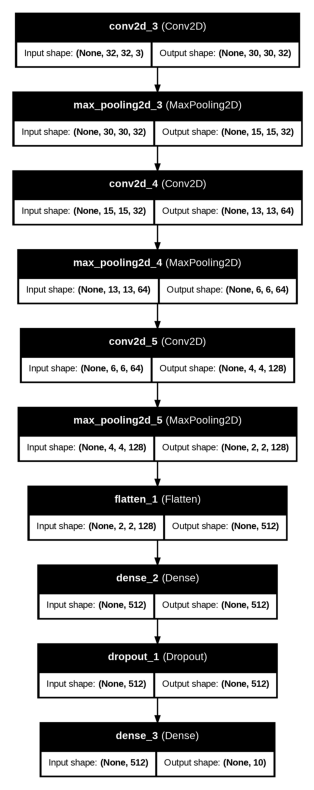

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

# Visualize the model architecture
plot_model(model_cifar, to_file='cifar10_model_visualization.png', show_shapes=True, show_layer_names=True)

# Load and display the saved model visualization
img = Image.open('cifar10_model_visualization.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# **PART-C (CNN MODEL TRAINIMG FOR LOCAL DATASET)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
train_data_path = "/content/drive/MyDrive/training " # Replace with your directory path
val_data_path = "/content/drive/MyDrive/validation" # Replace with your validation path

In [ ]:
# Create ImageDataGenerator objects for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and preprocess the images from the directories
train_generator = train_datagen.flow_from_directory(train_data_path,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,class_mode='categorical'  # Multi-class classification
)

validation_generator = val_datagen.flow_from_directory(val_data_path,target_size=(150, 150),batch_size=32,class_mode='categorical')

# Print the number of classes
print(f"Number of classes: {len(train_generator.class_indices)}")

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Number of classes: 2


In [ ]:
# Build the CNN model
local_model = Sequential()

# Add convolutional layers
local_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
local_model.add(MaxPooling2D(pool_size=(2, 2)))

local_model.add(Conv2D(64, (3, 3), activation='relu'))
local_model.add(MaxPooling2D(pool_size=(2, 2)))

local_model.add(Conv2D(128, (3, 3), activation='relu'))
local_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D feature vectors
local_model.add(Flatten())

# Fully connected dense layer
local_model.add(Dense(512, activation='relu'))

# Add Dropout for regularization to prevent overfitting
local_model.add(Dropout(0.5))

# Output layer (number of classes depends on the dataset)
local_model.add(Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
local_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

# Print the model summary
local_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the local dataset
history_local = local_model.fit(
    train_generator,  # Training data
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can increase the number of epochs
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 1.3535
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5500 - loss: 1.3309 - val_accuracy: 0.5000 - val_loss: 6.3863
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.5000 - loss: 5.4420 - val_accuracy: 0.5000 - val_loss: 2.5839
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.5000 - loss: 2.0459 - val_accuracy: 0.5000 - val_loss: 0.7808
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5500 - loss: 0.7973 - val_accuracy: 0.5000 - val_loss: 0.9846
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.5000 - loss: 0.8756 - val_accuracy: 0.5000 - val_loss: 0.7877
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5000 - loss: 0.7704 - val_accuracy: 0.5000 - val_loss: 0.7200
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.4500 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.7008
Epoch 9

In [ ]:
# Evaluate the model on the validation dataset
val_loss_local, val_accuracy_local = local_model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy_local * 100:.2f}%")

# Save the trained model
local_model.save('local_dataset_classification_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6000 - loss: 0.6817


Validation Accuracy: 60.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


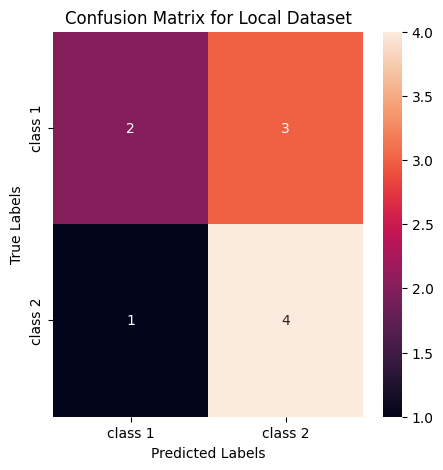

Classification Report:
              precision    recall  f1-score   support

     class 1       0.67      0.40      0.50         5
     class 2       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



In [ ]:
# Predict the classes for the validation dataset
y_pred_local = local_model.predict(validation_generator)
y_pred_classes_local = np.argmax(y_pred_local, axis=1)  # Convert predictions to class labels

# Get the true labels from the validation set
y_true_local = validation_generator.classes

# Generate the confusion matrix
conf_matrix_local = confusion_matrix(y_true_local, y_pred_classes_local)

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_local, annot=True, fmt='d',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix for Local Dataset')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Correct the classification report by ensuring the correct labels match the classes
print("Classification Report:")
target_names_local = list(validation_generator.class_indices.keys())

# Add the `labels` parameter to match true label indices and predicted classes
print(classification_report(y_true_local, y_pred_classes_local,
                            target_names=target_names_local,
                            labels=np.unique(y_true_local)))


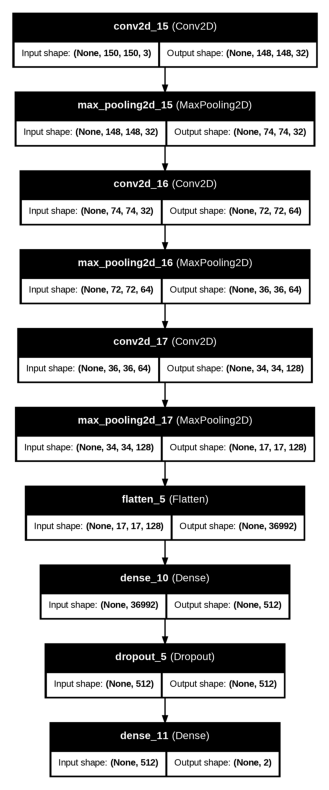

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

# Visualize the model architecture
plot_model(local_model, to_file='local_model_visualization.png', show_shapes=True, show_layer_names=True)

# Load and display the saved model visualization
img = Image.open('local_model_visualization.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()


# **PART-D (CHANGING RUNTIME AND TRAINING CNN MODEL FOR KERAS DATASET)**

TPU not found. Using GPU/CPU instead.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2298 - loss: 2.0401 - val_accuracy: 0.4632 - val_loss: 1.5067
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4383 - loss: 1.5394 - val_accuracy: 0.5096 - val_loss: 1.3580
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5025 - loss: 1.3950 - val_accuracy: 0.5335 - val_loss: 1.3234
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5487 - loss: 1.2795 - val_accuracy: 0.5948 - val_loss: 1.1270
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5794 - loss: 1.1890 - val_accuracy: 0.6206 - val_loss: 1.0771
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6049 - loss: 1.1263 - val_accuracy: 0.6486 - val_loss: 0.9922
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6221 - loss: 1.0675 - val_accuracy: 0.6598 - val_loss: 0.9667
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6395 - loss: 1.0261 - val_accuracy:

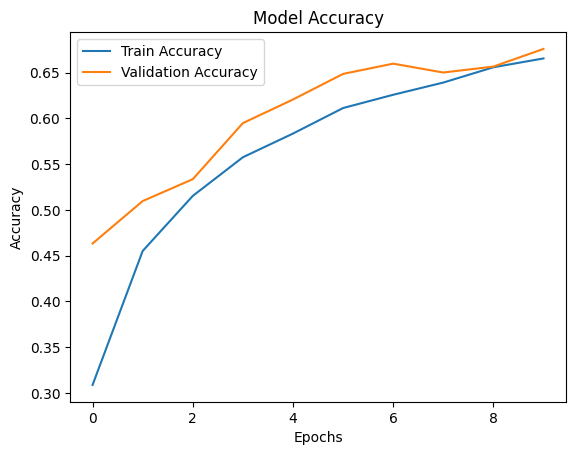

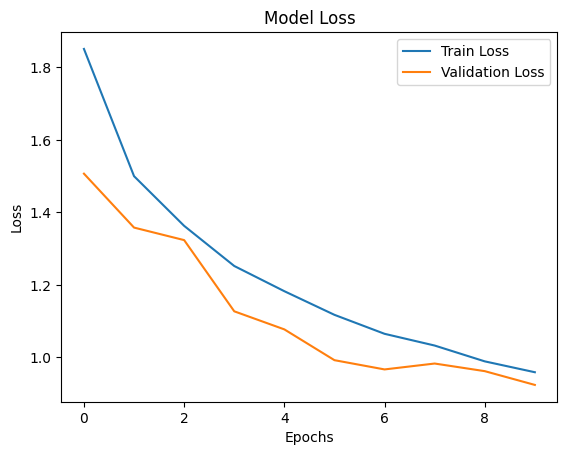

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Check if TPU is available and use it if found, otherwise fallback to GPU or CPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Get TPU resolver
    print('Running on TPU ', tpu.master())

    # Connect to TPU
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)

    # Define TPU strategy
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print('TPU not found. Using GPU/CPU instead.')
    # Fallback to default strategy for GPU or CPU
    strategy = tf.distribute.MirroredStrategy()

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the pixel values (scale between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the CNN model within the strategy scope
with strategy.scope():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
